In [32]:
#import relevant libraries
import pandas as pd
from sklearn import tree, metrics

# Problem (1)

On the madelon dataset, train decision trees of maximum depth 1, 2, .... up to
12, for a total of 12 decision trees. If your package does not allow the max depth
as a parameter, train trees with $2^1, 2^2, ..., 2^{12}$ nodes, again a total of 12 trees. Use
the trained trees to predict the class labels on the training and test sets, and obtain
the training and test misclassification errors. Plot on the same graph the training
and test misclassification errors vs tree depth (or log2 of nodes) as two separate
curves. Report in a table the minimum test error and the tree depth (number of
nodes or splits) for which the minimum was attained. (2 points)

In [33]:
# Import madelon dataset from UCI repository
madelon_x_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.data"
madelon_y_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.labels"
madelon_x_test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_valid.data"
madelon_y_test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/madelon_valid.labels"
madelon_x = pd.read_csv(madelon_x_url, header=None, delim_whitespace=True)
madelon_y = pd.read_csv(madelon_y_url, header=None, delim_whitespace=True)
madelon_x_test = pd.read_csv(madelon_x_test_url, header=None, delim_whitespace=True)
madelon_y_test = pd.read_csv(madelon_y_test_url, header=None, delim_whitespace=True)


train_error = []
test_error = []

# Create-train-predict decision trees and calculate misclassification rate
for depth in range(1,13):
    clf  = tree.DecisionTreeClassifier(max_depth=depth, random_state = 0)
    clf = clf.fit(madelon_x, madelon_y)

    train_pred = clf.predict(madelon_x)
    test_pred = clf.predict(madelon_x_test)

    train_error.append(1-metrics.accuracy_score(madelon_y, train_pred))
    test_error.append(1-metrics.accuracy_score(madelon_y_test, test_pred))

The following shows the graph contrasting the training error and the test error.

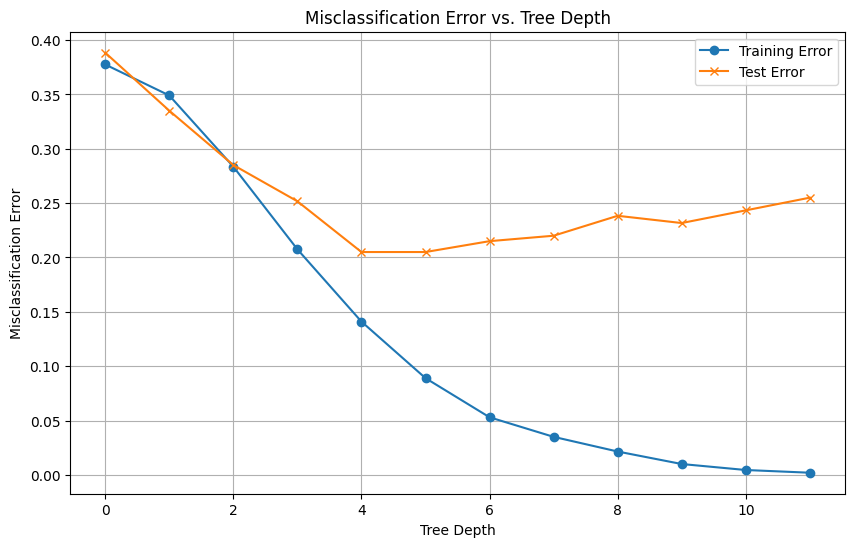

In [34]:
import matplotlib.pyplot as plt

# Plotting misclassification errors
plt.figure(figsize=(10, 6))
plt.plot(range(12), train_error, marker='o', label='Training Error')
plt.plot(range(12), test_error, marker='x', label='Test Error')
plt.xlabel('Tree Depth')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

The following shows the minimal test error and the corresponding tree depth.

In [35]:
import pandas as pd

table = {
    'Tree Depth': [test_error.index(min(test_error))],
    'Minimal Test Error': [min(test_error)]
}

df = pd.DataFrame(table)
df

,Tree Depth,Minimal Test Error
0,4,0.205
